In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import yfinance as yf
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file by calling the load_dotenv function
load_dotenv()

True

In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio. (15 ETH to compare similar value with BTC)
btc_coins = 1
eth_coins = 15

In [4]:
# Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# json.dumps function to review the response data from the API call
# Indent and sort_keys parameters to make the response object readable
print(json.dumps(
    btc_response,
    indent=4,
    sort_keys=True)
)


{
    "data": {
        "1": {
            "circulating_supply": 18792100,
            "id": 1,
            "last_updated": 1629488663,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 914067835816,
                    "percent_change_1h": 0.673163827355248,
                    "percent_change_24h": 4.18681302469471,
                    "percent_change_7d": 9.46272027406438,
                    "percentage_change_1h": 0.673163827355248,
                    "percentage_change_24h": 4.18681302469471,
                    "percentage_change_7d": 9.46272027406438,
                    "price": 48706.0,
                    "volume_24h": 35819599956
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18792100,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencies"

In [6]:
# Same for ETH
eth_response = requests.get(eth_url).json()

print(json.dumps(
    eth_response,
    indent=4,
    sort_keys=True)
)

{
    "data": {
        "1027": {
            "circulating_supply": 117186663,
            "id": 1027,
            "last_updated": 1629488663,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 381739078551,
                    "percent_change_1h": 1.0230659326122,
                    "percent_change_24h": 3.8342732800498,
                    "percent_change_7d": 6.85660494098982,
                    "percentage_change_1h": 1.0230659326122,
                    "percentage_change_24h": 3.8342732800498,
                    "percentage_change_7d": 6.85660494098982,
                    "price": 3257.43,
                    "volume_24h": 21193360327
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 117186663,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencies": 3

In [7]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]['1']["quotes"]["USD"]["price"]

# Print the current price of BTC
print(f"The current price for Bitcoin is ${btc_price:,}")


The current price for Bitcoin is $48,706.0


In [8]:
# Same for ETH
eth_price = eth_response["data"]['1027']["quotes"]["USD"]["price"]

print(f"""The current price for Ethereum is ${eth_price:,}
The price for 10 ETH is ${15*eth_price:,.2f}
""")

The current price for Ethereum is $3,257.43
The price for 10 ETH is $48,861.45



In [9]:
# use yfinance to retrieve BTC and ETH close values

def retrieve_yahoo_data(ticker = 'btc-usd', start_date = '2017-08-19', end_date = '2021-8-19'):

    yahoo_data = yf.Ticker(ticker)
    print(f"Ticker is {ticker}")
    price_df = yahoo_data.history(start=start_date, end=end_date)
    price_df.name = ticker

    return price_df

btc_df = retrieve_yahoo_data(ticker = 'btc-usd')
display (btc_df)

eth_df = retrieve_yahoo_data(ticker = 'eth-usd')
display (eth_df)

Ticker is btc-usd


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-08-18,4324.339844,4370.129883,4015.399902,4160.620117,2941710080,0,0
2017-08-19,4137.750000,4243.259766,3970.550049,4193.700195,2975820032,0,0
2017-08-20,4189.310059,4196.290039,4069.879883,4087.659912,2109769984,0,0
2017-08-21,4090.479980,4109.140137,3988.600098,4001.739990,2800890112,0,0
2017-08-22,3998.350098,4128.759766,3674.580078,4100.520020,3764239872,0,0
...,...,...,...,...,...,...,...
2021-08-14,47810.687500,48098.683594,46177.632812,47096.945312,31211354442,0,0
2021-08-15,47096.667969,47357.105469,45579.589844,47047.003906,30988958446,0,0
2021-08-16,47019.960938,47998.097656,45700.320312,46004.484375,32776876610,0,0


Ticker is eth-usd


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-08-18,301.696991,307.959991,292.498993,295.589996,936160000,0,0
2017-08-19,296.181000,301.666992,286.183014,297.470001,860201984,0,0
2017-08-20,296.644012,301.428009,291.579987,301.428009,571947008,0,0
2017-08-21,300.476013,347.049011,297.234009,321.591003,2448969984,0,0
2017-08-22,321.054993,327.360992,297.912994,314.785004,1336400000,0,0
...,...,...,...,...,...,...,...
2021-08-14,3322.762695,3329.281006,3214.519775,3265.443359,19860862133,0,0
2021-08-15,3266.276123,3320.084229,3117.791748,3310.504150,22166205051,0,0
2021-08-16,3309.422119,3333.994873,3139.778564,3156.509521,23080039949,0,0


In [10]:
data = yf.download("BTC-USD ETH-USD", start="2015-08-19",
                    end="2021-8-19", group_by='tickers')

data= data.rename(columns=str.lower)

data

[*********************100%***********************]  2 of 2 completed


eth-usd                                                      \
                   open         high          low        close    adj close   
Date                                                                          
2015-08-18     1.215300     1.331160     1.087050     1.087050     1.087050   
2015-08-19     1.166930     1.317990     1.166930     1.258860     1.258860   
2015-08-20     1.251180     1.533300     1.248330     1.464920     1.464920   
2015-08-21     1.477520     1.556420     1.352800     1.395290     1.395290   
2015-08-22     1.396290     1.476410     1.352680     1.379230     1.379230   
...                 ...          ...          ...          ...          ...   
2021-08-14  3322.762695  3329.281006  3214.519775  3265.443359  3265.443359   
2021-08-15  3266.276123  3320.084229  3117.791748  3310.504150  3310.504150   
2021-08-16  3309.422119  3333.994873  3139.778564  3156.509521  3156.509521   
2021-08-17  3149.380371  3288.812744  2996.468262  3014.845947  3014.845947   
2021-08-18  3011.963623  3124.976074  2959.028320  3020.089844  3020.089844   

                              btc-usd                              \
                 volume          open          high           low   
Date                                                                
2015-08-18      1485680    257.925995    257.993011    211.078995   
2015-08-19      1486240    225.671005    237.408997    222.766006   
2015-08-20      2843760    226.899002    237.365005    226.899002   
2015-08-21      2020970    235.354996    236.432007    231.723999   
2015-08-22       948310    232.662003    234.957001    222.703995   
...                 ...           ...           ...           ...   
2021-08-14  19860862133  47810.687500  48098.683594  46177.632812   
2021-08-15  22166205051  47096.667969  47357.105469  45579.589844   
2021-08-16  23080039949  47019.960938  47998.097656  45700.320312   
2021-08-17  25509056745  45936.457031  47139.570312  44512.417969   
2021-08-18  21539248425  44686.750000  45952.062500  44364.027344   

                                                     
                   close     adj close       volume  
Date                                                 
2015-08-18    211.078995    211.078995     42147200  
2015-08-19    226.684006    226.684006     60869200  
2015-08-20    235.350006    235.350006     32275000  
2015-08-21    232.569000    232.569000     23173800  
2015-08-22    230.389999    230.389999     23205900  
...                  ...           ...          ...  
2021-08-14  47096.945312  47096.945312  31211354442  
2021-08-15  47047.003906  47047.003906  30988958446  
2021-08-16  46004.484375  46004.484375  32776876610  
2021-08-17  44695.359375  44695.359375  33451362600  
2021-08-18  44801.187500  44801.187500  32194123075  

[2189 rows x 12 columns]

In [19]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
btc_10_year_simulation = MCSimulation(
    data,
    weights = [1,0],
    num_simulation = 5000,
    num_trading_days = 252*5
)

# Review the simulation input data
btc_10_year_simulation.portfolio_data.tail()


eth-usd                                                      \
                   open         high          low        close    adj close   
Date                                                                          
2021-08-14  3322.762695  3329.281006  3214.519775  3265.443359  3265.443359   
2021-08-15  3266.276123  3320.084229  3117.791748  3310.504150  3310.504150   
2021-08-16  3309.422119  3333.994873  3139.778564  3156.509521  3156.509521   
2021-08-17  3149.380371  3288.812744  2996.468262  3014.845947  3014.845947   
2021-08-18  3011.963623  3124.976074  2959.028320  3020.089844  3020.089844   

                                           btc-usd                \
                 volume daily_return          open          high   
Date                                                               
2021-08-14  19860862133    -0.017088  47810.687500  48098.683594   
2021-08-15  22166205051     0.013799  47096.667969  47357.105469   
2021-08-16  23080039949    -0.046517  47019.960938  47998.097656   
2021-08-17  25509056745    -0.044880  45936.457031  47139.570312   
2021-08-18  21539248425     0.001739  44686.750000  45952.062500   

                                                                                
                     low         close     adj close       volume daily_return  
Date                                                                            
2021-08-14  46177.632812  47096.945312  47096.945312  31211354442    -0.014571  
2021-08-15  45579.589844  47047.003906  47047.003906  30988958446    -0.001060  
2021-08-16  45700.320312  46004.484375  46004.484375  32776876610    -0.022159  
2021-08-17  44512.417969  44695.359375  44695.359375  33451362600    -0.028456  
2021-08-18  44364.027344  44801.187500  44801.187500  32194123075     0.002368

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

<AxesSubplot:title={'center':'5000 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

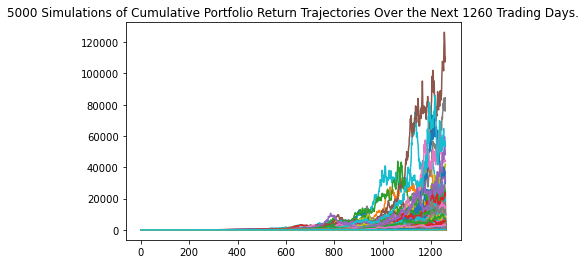

In [20]:
btc_10_year_simulation.plot_simulation()

In [21]:
summary = btc_10_year_simulation.summarize_cumulative_return()
summary

count             5000.000000
mean               756.058888
std               3257.687274
min                  0.034244
25%                 21.834356
50%                 95.265342
75%                400.822636
max             110180.724819
95% CI Lower         1.530420
95% CI Upper      5233.781925
Name: 1260, dtype: float64

In [22]:
ci_lower_ten_cumulative_return = summary[8]*btc_price
ci_upper_ten_cumulative_return = summary[9]*btc_price

print(f"""{ci_lower_ten_cumulative_return:,.2f}
{ci_upper_ten_cumulative_return:,.2f}""")

74,540.64
254,916,582.43
